<a href="https://colab.research.google.com/github/lmiel/Perdidos_en_el_espacio/blob/master/Perdidos_en_el_espacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.5 MB/s eta 0:00:00


In [24]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
from sklearn.preprocessing import LabelEncoder
fake = Faker()

a- Con una longitud L= 1.00 m cronometran t = 0.46 s.<br>
¿Cuánto vale g y su error?<br>
¿En qué planeta están, o pueden estar?

In [20]:
L1 = 1.00 
t1 = 0.46 

delta_L1 = 0.01  
delta_t1 = 0.01 

g = round((2 * L1) / (t1 ** 2), 3)
delta_g = round(np.sqrt((delta_L1 * 2 / t1 ** 2) ** 2 + (delta_t1 * 4 * L1 / t1 ** 3) ** 2), 3)

print(f"El valor calculado de g es {g} +/- {delta_g} m/s^2")


El valor calculado de g es 9.452 +/- 0.422 m/s^2


b.- Con una longitud L=2.00 m cronometran t = 0.66 s. <br>
¿Cuánto vale g y su error?<br>
¿En qué planeta están, o pueden estar?<br>
¿Con que probabilidad puedes afirmarlo?

In [21]:
L1 = 2.00 
t1 = 0.66 

delta_L1 = 0.01  
delta_t1 = 0.01 

g = round((2 * L1) / (t1 ** 2), 3)
delta_g = round(np.sqrt((delta_L1 * 2 / t1 ** 2) ** 2 + (delta_t1 * 4 * L1 / t1 ** 3) ** 2), 3)

print(f"El valor calculado de g es {g} +/- {delta_g} m/s^2")

El valor calculado de g es 9.183 +/- 0.282 m/s^2


In [22]:
gravedades = {"Planeta": ["Mercurio", "Venus", "Tierra", "Marte", "Júpiter", "Saturno", "Urano", "Neptuno"],
             "Gravedad (m/s²)": [3.7, 8.87, 9.8, 3.71, 24.79, 10.44, 8.87, 11.15]}

df_gravedades = pd.DataFrame(gravedades)

# Mostramos el DataFrame
print(df_gravedades)

    Planeta  Gravedad (m/s²)
0  Mercurio             3.70
1     Venus             8.87
2    Tierra             9.80
3     Marte             3.71
4   Júpiter            24.79
5   Saturno            10.44
6     Urano             8.87
7   Neptuno            11.15


Creamos una recta con los valores del experimento para poder generar valores cercanos a esa recta, con variaciones pequeñas.

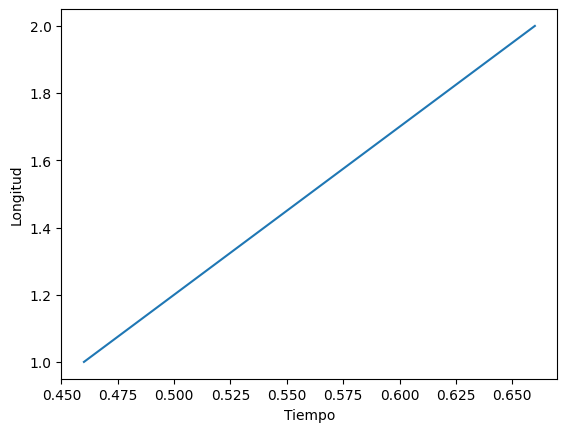

In [4]:
x = [0.46, 0.66]
y = [1, 2]

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('Tiempo')
ax.set_ylabel('Longitud')

plt.show()


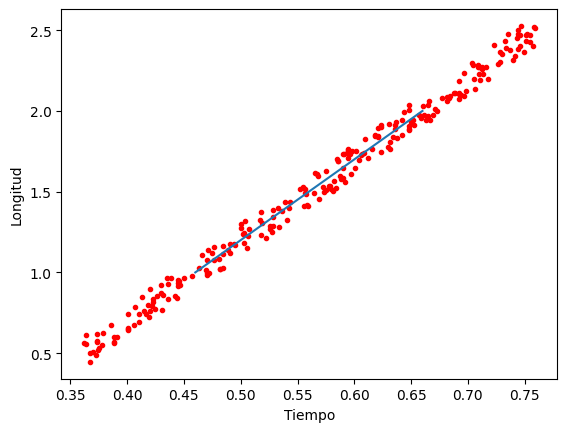

In [5]:
x = [0.46, 0.66]
y = [1, 2]

m = (y[1] - y[0]) / (x[1] - x[0])
b = y[0] - m * x[0]

x_new = [random.uniform(min(x) - 0.1, max(x) + 0.1) for _ in range(250)]

y_new = [m * xi + b for xi in x_new]
y_new = [yi + random.uniform(-0.1, 0.1) for yi in y_new]

fig, ax = plt.subplots()

ax.plot(x, y)
ax.scatter(x_new, y_new, marker='.', color='red')

ax.set_xlabel('Tiempo')
ax.set_ylabel('Longitud')

plt.show()


In [9]:
dataset = []
for i in range(len(x_new)):
    L = round(y_new[i], 2)
    t = round(x_new[i], 2)
    g_calculated = round((2 * L) / (t**2), 2)

    L_error = 0.01 
    t_error = 0.01 
    dg_dL = 2 / t**2 
    dg_dt = -4 * L / t**3 
    g_error_sin = np.sqrt((dg_dL * L_error)**2 + (dg_dt * t_error)**2)
    g_error = round(g_error_sin,4)

    most_probable_planet = "Tierra" if abs(g_calculated - 9.8) - g_error < abs(g_calculated - 9.0) + g_error else "Saturno"
    second_most_probable_planet = "Saturno" if most_probable_planet == "Tierra" else "Tierra"
    data_point = {
        "Longitud (m)": L,
        "Tiempo (s)": t,
        "g_calculado (m/s²)": g_calculated,
        "g_error": g_error,
        "Planeta más probable": most_probable_planet,
        "2do más probable": second_most_probable_planet
    }
    dataset.append(data_point)
df = pd.DataFrame(dataset)

In [12]:
df.head()

,Longitud (m),Tiempo (s),g_calculado (m/s²),g_error,Planeta más probable,2do más probable
0,0.86,0.43,9.30,0.4460,Tierra,Saturno
1,0.78,0.41,9.28,0.4681,Tierra,Saturno
2,1.52,0.58,9.04,0.3172,Saturno,Tierra
3,1.27,0.51,9.77,0.3906,Tierra,Saturno
4,0.56,0.36,8.64,0.5043,Tierra,Saturno


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Longitud (m)          250 non-null    float64
 1   Tiempo (s)            250 non-null    float64
 2   g_calculado (m/s²)    250 non-null    float64
 3   g_error               250 non-null    float64
 4   Planeta más probable  250 non-null    object 
 5   2do más probable      250 non-null    object 
dtypes: float64(4), object(2)
memory usage: 11.8+ KB


In [13]:
df.describe()

,Longitud (m),Tiempo (s),g_calculado (m/s²),g_error
count,250.000000,250.00000,250.00000,250.000000
mean,1.538040,0.56872,9.13828,0.342940
std,0.578474,0.11531,0.61260,0.075699
min,0.450000,0.36000,6.57000,0.221400
25%,1.030000,0.47000,8.85000,0.275300
50%,1.570000,0.58000,9.10000,0.331950
75%,1.997500,0.66750,9.57000,0.407425
max,2.530000,0.76000,10.56000,0.545300


In [14]:
df.dtypes

Longitud (m)            float64
Tiempo (s)              float64
g_calculado (m/s²)      float64
g_error                 float64
Planeta más probable     object
2do más probable         object
dtype: object

Probabilidades

In [17]:
counts = {"Tierra": 0, "Saturno": 0}

for sample in dataset:
    counts[sample["Planeta más probable"]] += 1

print("Planeta más probable:")
for planet, count in counts.items():
    print(f"{planet}: {count}")

Planeta más probable:
Tierra: 157
Saturno: 93


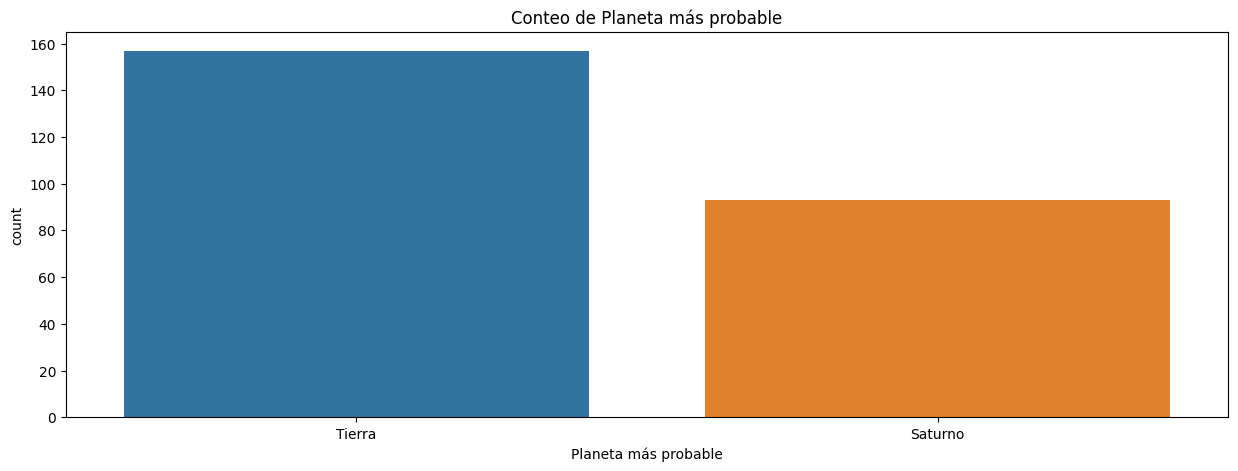

In [33]:
fig, ax = plt.subplots(1, figsize=(15, 5))

sns.countplot(x=df['Planeta más probable'])
ax.set_title('Conteo de Planeta más probable')

plt.show()

In [16]:
df = pd.DataFrame(dataset)

counts = df["Planeta más probable"].value_counts()
probabilities = counts / len(df)

print(probabilities)

Tierra     0.628
Saturno    0.372
Name: Planeta más probable, dtype: float64


histograma de la distribución de una las tres variables: longitud, tiempo y gravedad calculada.

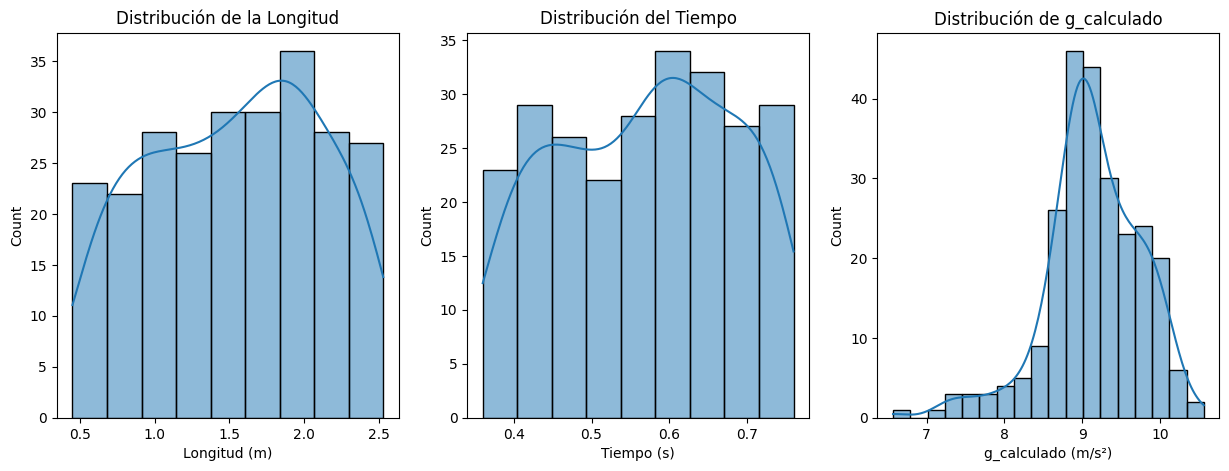

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['Longitud (m)'], ax=ax[0], kde=True)
ax[0].set_title('Distribución de la Longitud')

sns.histplot(df['Tiempo (s)'], ax=ax[1], kde=True)
ax[1].set_title('Distribución del Tiempo')

sns.histplot(df['g_calculado (m/s²)'], ax=ax[2], kde=True)
ax[2].set_title('Distribución de g_calculado')

plt.show()

Matriz de dispersión

array([[<Axes: xlabel='Longitud (m)', ylabel='Longitud (m)'>,
        <Axes: xlabel='Tiempo (s)', ylabel='Longitud (m)'>,
        <Axes: xlabel='g_calculado (m/s²)', ylabel='Longitud (m)'>,
        <Axes: xlabel='g_error', ylabel='Longitud (m)'>],
       [<Axes: xlabel='Longitud (m)', ylabel='Tiempo (s)'>,
        <Axes: xlabel='Tiempo (s)', ylabel='Tiempo (s)'>,
        <Axes: xlabel='g_calculado (m/s²)', ylabel='Tiempo (s)'>,
        <Axes: xlabel='g_error', ylabel='Tiempo (s)'>],
       [<Axes: xlabel='Longitud (m)', ylabel='g_calculado (m/s²)'>,
        <Axes: xlabel='Tiempo (s)', ylabel='g_calculado (m/s²)'>,
        <Axes: xlabel='g_calculado (m/s²)', ylabel='g_calculado (m/s²)'>,
        <Axes: xlabel='g_error', ylabel='g_calculado (m/s²)'>],
       [<Axes: xlabel='Longitud (m)', ylabel='g_error'>,
        <Axes: xlabel='Tiempo (s)', ylabel='g_error'>,
        <Axes: xlabel='g_calculado (m/s²)', ylabel='g_error'>,
        <Axes: xlabel='g_error', ylabel='g_error'>]], dtype=objec

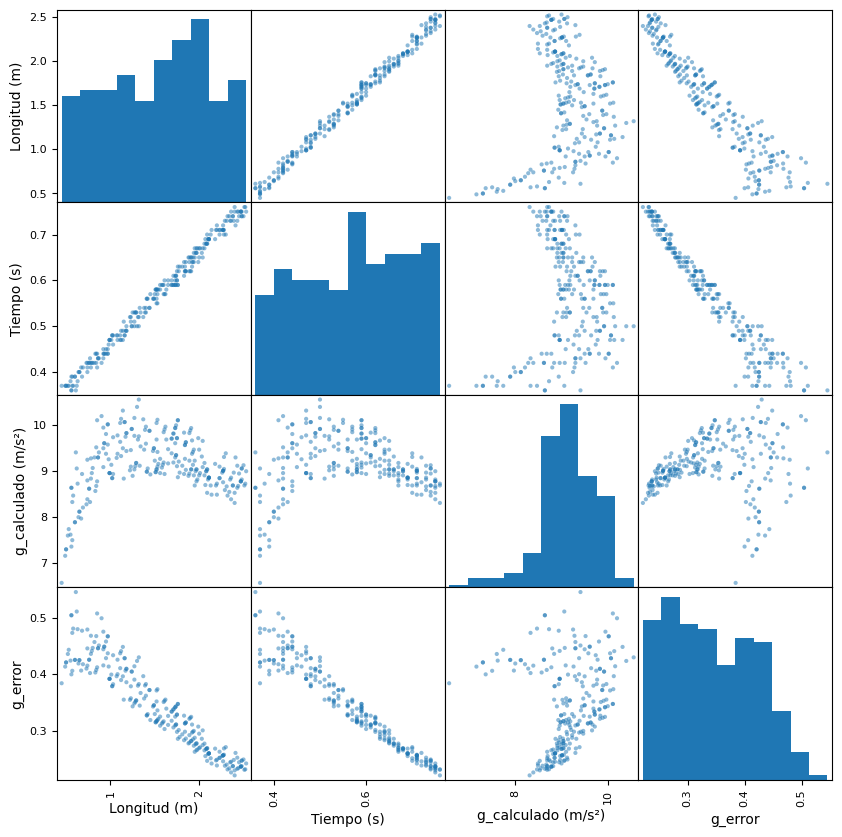

In [38]:
scatter_matrix(df, alpha=0.5, figsize=(10,10), diagonal='hist')